In [73]:
import pandas as pd
from pandas.api.types import is_string_dtype,is_numeric_dtype
from sklearn import preprocessing
from sklearn.externals import joblib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [75]:
#reading file(train and test)
train_df = pd.read_csv(f'/Users/anithakanna/Desktop/Machine Learning/project_train.csv')
test_df = pd.read_csv(f'/Users/anithakanna/Desktop/Machine Learning/test_set.csv')
train_df1=train_df.drop(['price'],axis=1)
my_df=pd.concat([train_df1,test_df])
print(my_df.shape)
my_df.head(4)

(20222, 20)


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2473350710,20141027T000000,4,1.75,2330,8364,1.0,0,0,4,8,2330,0,1968,0,98058,47.4568,-122.146,2180.0,9630.0
1,7100000250,20150211T000000,3,1.00,1400,8710,1.0,0,0,4,7,1400,0,1948,0,98146,47.5066,-122.377,1460.0,8710.0
2,1443500725,20150423T000000,3,1.00,1350,7553,1.5,0,0,3,6,1350,0,1914,0,98118,47.5345,-122.274,1380.0,7470.0
3,2321059093,20140805T000000,3,2.50,2100,213008,1.0,0,0,3,8,2100,0,1990,0,98092,47.2984,-122.144,1330.0,214315.0


In [76]:
my_df.isna().any()

id               False
date             False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long              True
sqft_living15     True
sqft_lot15        True
dtype: bool

In [77]:
my_df[my_df.isnull().any(axis=1)]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11184,2225069036,20140815T000000,4,3.25,3640,60086,2.0,0,0,3,10,3640,0,2005,0,98074,47.0,NaN,NaN,NaN


In [78]:
my_df.fillna(my_df.mean(), inplace=True)

In [79]:
my_df.isna().any()

id               False
date             False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [80]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20222 entries, 0 to 4221
Data columns (total 20 columns):
id               20222 non-null int64
date             20222 non-null object
bedrooms         20222 non-null int64
bathrooms        20222 non-null float64
sqft_living      20222 non-null int64
sqft_lot         20222 non-null int64
floors           20222 non-null float64
waterfront       20222 non-null int64
view             20222 non-null int64
condition        20222 non-null int64
grade            20222 non-null int64
sqft_above       20222 non-null int64
sqft_basement    20222 non-null int64
yr_built         20222 non-null int64
yr_renovated     20222 non-null int64
zipcode          20222 non-null int64
lat              20222 non-null float64
long             20222 non-null float64
sqft_living15    20222 non-null float64
sqft_lot15       20222 non-null float64
dtypes: float64(6), int64(13), object(1)
memory usage: 3.2+ MB


In [81]:
my_df["date"]=pd.to_datetime(my_df["date"])

In [82]:
my_df.head(4)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2473350710,2014-10-27,4,1.75,2330,8364,1.0,0,0,4,8,2330,0,1968,0,98058,47.4568,-122.146,2180.0,9630.0
1,7100000250,2015-02-11,3,1.00,1400,8710,1.0,0,0,4,7,1400,0,1948,0,98146,47.5066,-122.377,1460.0,8710.0
2,1443500725,2015-04-23,3,1.00,1350,7553,1.5,0,0,3,6,1350,0,1914,0,98118,47.5345,-122.274,1380.0,7470.0
3,2321059093,2014-08-05,3,2.50,2100,213008,1.0,0,0,3,8,2100,0,1990,0,98092,47.2984,-122.144,1330.0,214315.0


In [83]:
my_df['dateYear']=my_df['date'].apply(lambda x: x.strftime('%Y'))
my_df["dateYear"]= pd.to_numeric(my_df['dateYear'])

In [84]:
df=my_df.drop(['id','date'],axis=1)

In [85]:
#encoding features
#converting into category
df["waterfront"]=df["waterfront"].astype('category')
#df["grade"]=df["grade"].astype('category')
df["zipcode"]=df["zipcode"].astype('category')

In [86]:
#giving dummy variables
df=pd.get_dummies(df,columns=['waterfront'],drop_first=True)
#df=pd.get_dummies(df,columns=['grade'],drop_first=True)
df=pd.get_dummies(df,columns=['zipcode'],drop_first=True)

In [87]:
print (df.shape)
df.info()

(20222, 87)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20222 entries, 0 to 4221
Data columns (total 87 columns):
bedrooms         20222 non-null int64
bathrooms        20222 non-null float64
sqft_living      20222 non-null int64
sqft_lot         20222 non-null int64
floors           20222 non-null float64
view             20222 non-null int64
condition        20222 non-null int64
grade            20222 non-null int64
sqft_above       20222 non-null int64
sqft_basement    20222 non-null int64
yr_built         20222 non-null int64
yr_renovated     20222 non-null int64
lat              20222 non-null float64
long             20222 non-null float64
sqft_living15    20222 non-null float64
sqft_lot15       20222 non-null float64
dateYear         20222 non-null int64
waterfront_1     20222 non-null uint8
zipcode_98002    20222 non-null uint8
zipcode_98003    20222 non-null uint8
zipcode_98004    20222 non-null uint8
zipcode_98005    20222 non-null uint8
zipcode_98006    20222 non-null 

In [88]:
#splitting x and y
y=train_df['price']
#X=df
print (y.shape,X.shape)

(16000,) (20222, 88)


In [89]:
#taking log of y to normalise
import numpy as np
y_log= np.log(y)
y_log
#print (y_log.shape)

0        12.873902
1        12.847927
2        12.542545
3        13.134292
4        13.028053
5        13.577888
6        13.369223
7        13.345507
8        13.425427
9        12.894207
10       13.361380
11       13.112313
12       12.805596
13       12.524526
14       12.506177
15       13.493927
16       13.480038
17       12.660328
18       12.409013
19       12.396693
20       13.126355
21       13.049793
22       12.779873
23       13.161584
24       13.270783
25       14.151983
26       13.372344
27       12.718896
28       13.102161
29       13.897551
           ...    
15970    12.367341
15971    13.056224
15972    12.429016
15973    13.197471
15974    13.467371
15975    12.697715
15976    12.971540
15977    12.258428
15978    12.772806
15979    14.467836
15980    12.254863
15981    13.652992
15982    12.608199
15983    13.764217
15984    13.385497
15985    13.000196
15986    12.644328
15987    12.807653
15988    12.493130
15989    12.546110
15990    13.005830
15991    13.

In [90]:
#splitting continous and categorical variables fro scaling purposes
X_con=df[['dateYear','sqft_lot15','sqft_living15','long','lat','yr_renovated','yr_built','sqft_basement','sqft_above','condition','floors','sqft_lot','sqft_living','bathrooms','bedrooms']]
X_cat=df.drop(X_con,axis = 1)
print (X_con.shape,X_cat.shape)

(20222, 15) (20222, 72)


In [91]:
#scaling values
scaler = preprocessing.StandardScaler().fit(X_con)
X_con_sc = pd.DataFrame(scaler.transform(X_con))
X_con_sc.columns = ["dateYear","sqft_lot15","sqft_living15","long","lat","yr_renovated","yr_built","sqft_basement","sqft_above","condition","floors","sqft_lot","sqft_living","bathrooms","bedrooms"]
print(X_con_sc.shape)
X_con_sc.tail(2)

(20222, 15)


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


,dateYear,sqft_lot15,sqft_living15,long,lat,yr_renovated,yr_built,sqft_basement,sqft_above,condition,floors,sqft_lot,sqft_living,bathrooms,bedrooms
20220,1.521539,-0.189638,-0.619211,0.903832,-1.380408,-0.214683,0.703999,-0.665082,-0.348324,-0.645246,-0.891623,-0.186666,-0.638087,-0.127429,-0.398184
20221,-0.657229,-0.371661,-0.583963,0.004959,-1.550235,-0.214683,1.465232,-0.665082,-0.234001,-0.645246,0.997366,-0.303719,-0.535080,0.198468,-0.398184


In [92]:
print (X_con_sc.shape,X_cat.shape)

(20222, 15) (20222, 72)


In [96]:
#adding back both cat and con features

X_cat.reset_index(drop=True, inplace=True)
X_con_sc.reset_index(drop=True, inplace=True)
df_list = [X_cat,X_con_sc]
X_concated = pd.concat(df_list,axis=1)
print(X_concated.shape)
X_concated.head(2)

(20222, 87)


,view,grade,waterfront_1,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,...,yr_renovated,yr_built,sqft_basement,sqft_above,condition,floors,sqft_lot,sqft_living,bathrooms,bedrooms
0,0,8,0,0,0,0,0,0,0,0,...,-0.214683,-0.057234,-0.665082,0.673288,0.871983,-0.891623,-0.168006,0.282395,-0.453325,0.676715
1,0,7,0,0,0,0,0,0,0,0,...,-0.214683,-0.749264,-0.665082,-0.457783,0.871983,-0.891623,-0.159567,-0.736710,-1.431014,-0.398184


In [97]:
#splitting train and test
def mydf_splitter(df,num_rows):
    return df[:num_rows].copy(),df[num_rows:]

Train,Test = mydf_splitter(X_concated,16000)

print (Train.shape,Test.shape)

(16000, 87) (4222, 87)


In [119]:
# splitting train n valid
def mydf_splitter(df,num_rows):
    return df[:num_rows].copy(),df[num_rows:]

X_train,X_valid = mydf_splitter(Train,13600)
y_train,y_valid = mydf_splitter(y_log,13600)
print (X_train.shape,X_valid.shape,y_train.shape,y_valid.shape)

(13600, 87) (2400, 87) (13600,) (2400,)


In [99]:
print (X_train.head())
y_train.head()

   view  grade  waterfront_1  zipcode_98002  zipcode_98003  zipcode_98004  \
0     0      8             0              0              0              0   
1     0      7             0              0              0              0   
2     0      6             0              0              0              0   
3     0      8             0              0              0              0   
4     0      7             0              0              0              0   

   zipcode_98005  zipcode_98006  zipcode_98007  zipcode_98008    ...     \
0              0              0              0              0    ...      
1              0              0              0              0    ...      
2              0              0              0              0    ...      
3              0              0              0              0    ...      
4              0              0              0              0    ...      

   yr_renovated  yr_built  sqft_basement  sqft_above  condition    floors  \
0     -0.

0    12.873902
1    12.847927
2    12.542545
3    13.134292
4    13.028053
Name: price, dtype: float64

In [100]:
#importing and fitting linear regression
from sklearn.linear_model import LinearRegression 
linear_reg=LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [101]:
#intercepts and coeff
print (linear_reg.intercept_)
print (linear_reg.coef_)

11.971192666490744
[ 5.98645002e-02  9.14836391e-02  4.60705653e-01  8.34596129e-04
  1.16132319e-03  9.65198592e-01  5.90056174e-01  5.25677197e-01
  5.44759299e-01  5.40435695e-01  3.33574322e-01  2.33491737e-01
  2.90679450e-01  2.26007854e-01  2.01433577e-01 -6.05540543e-02
  4.34705662e-01  4.76422317e-01  1.94220502e-01  5.71963925e-01
  5.15990188e-02  6.23771994e-02 -4.92419606e-02  6.10172823e-01
  3.41030070e-01  2.45521936e-01  1.07241031e+00  7.32371949e-01
  9.51973659e-02  4.50788529e-01  5.03170700e-01  4.85974435e-01
  7.98036156e-02  2.37943710e-01  1.44038301e-01  2.92638959e-01
  4.34002164e-01  1.97200376e-01  3.20794524e-01  4.69189080e-01
  4.88342951e-01  2.96049952e-01  7.30543190e-02  7.49591062e-01
  5.89007927e-01  7.38153674e-01  1.68693089e-01  5.90475093e-01
  2.27170518e-01  7.72880214e-01  8.42312699e-01  5.93218033e-01
  5.70670345e-01  5.56564598e-01  3.12368465e-01  7.74498240e-01
  6.38825634e-01  3.40240769e-01  3.74736631e-01  1.88906621e-01
  4.98

In [102]:
#sorting coeff and features
coef_dict = {}
for coef_, feat in list(zip(linear_reg.coef_,X_train)):
    coef_dict[feat] = coef_
    
import operator
sorted_d = sorted(coef_dict.items(), key=operator.itemgetter(1))

for key in sorted_d:
    print(key)

('sqft_living', -344606741757.7201)
('zipcode_98023', -0.060554054266346)
('long', -0.055408970374616506)
('zipcode_98032', -0.049241960596926274)
('zipcode_98168', -0.03459937346579817)
('floors', -0.014606945081504452)
('yr_built', -0.008010213331982763)
('zipcode_98002', 0.0008345961287816554)
('zipcode_98003', 0.001161323185729063)
('bedrooms', 0.00270129429636351)
('sqft_lot15', 0.003037347056236317)
('zipcode_98198', 0.003598802453866526)
('yr_renovated', 0.01684530479459334)
('zipcode_98188', 0.02022877882324787)
('dateYear', 0.02149711114292617)
('sqft_lot', 0.026787092359678966)
('bathrooms', 0.030202019626163742)
('condition', 0.04107265501081225)
('zipcode_98178', 0.048981689471067937)
('zipcode_98030', 0.05159901884427563)
('sqft_living15', 0.05383667747751836)
('view', 0.059864500194983274)
('zipcode_98031', 0.0623771993895768)
('zipcode_98092', 0.07305431904140507)
('lat', 0.0768805135134003)
('zipcode_98055', 0.07980361555530599)
('grade', 0.09148363910626084)
('zipcode_

In [103]:
#predicting on validation data
y_pred=linear_reg.predict(X_valid)
print (y_pred)

[14.2527423  12.53409229 12.22726253 ... 13.4835913  12.94783174
 13.12040057]


In [104]:
y_values=pd.DataFrame(y_valid)
y_values1=pd.DataFrame({'Predicted':y_pred})


In [105]:
#actual vs predicted
y_values.reset_index(drop=True, inplace=True)
y_values1.reset_index(drop=True, inplace=True)

y_comp=pd.concat([y_values,y_values1],axis=1)
y_comp.head()

,price,Predicted
0,13.810498,14.252742
1,12.058153,12.534092
2,12.301383,12.227263
3,14.038654,13.671350
4,14.801327,14.735235


In [106]:
# MAE,MSE,RMSE
from sklearn import metrics
print (metrics.mean_absolute_error(y_valid,y_pred))
print (metrics.mean_squared_error(y_valid,y_pred))
print (np.sqrt(metrics.mean_squared_error(y_valid,y_pred)))

0.13421715878457485
0.032846973380375316
0.1812373399175107


In [107]:
#R2
metrics.r2_score(y_valid,y_pred)

0.884736122146051

#The R squared value is 88%. Error is 0.181.
#But we are using all the features. 
#Lets do some feature selection and see if the result is enhanced

# Feature Selection

In [ ]:
#Try fitting in singl efeature at a time to check which features matter most. 

In [112]:
#taking only one feature - sqft living
X_single=pd.DataFrame(Train['sqft_living'])
X_single

,sqft_living
0,0.282395
1,-0.736710
2,-0.791500
3,0.030358
4,-0.517547
5,0.479641
6,1.257668
7,-0.375092
8,0.819343
9,-0.835333


In [113]:
#splitting train and valid
X_trainsingle,X_validsingle = mydf_splitter(X_single,13600)

print (X_trainsingle.shape,X_validsingle.shape)

(13600, 1) (2400, 1)


In [114]:
#linear regression fitting
linear_reg=LinearRegression()
linear_reg.fit(X_trainsingle,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [115]:
#predicting in vlaidation data
y_predSingle=linear_reg.predict(X_validsingle)
print (y_predSingle)

[13.98503913 12.81421551 12.70406834 ... 13.13241845 13.07938462
 13.45062138]


In [116]:
#finding error and accuracy
print (metrics.mean_absolute_error(y_valid,y_predSingle))
print (metrics.mean_squared_error(y_valid,y_predSingle))
print (np.sqrt(metrics.mean_squared_error(y_valid,y_predSingle)))
metrics.r2_score(y_valid,y_predSingle)

0.3128076850985381
0.14770059784378523
0.3843183548098961


0.4817012979651649

#The acuracy is only 0.48. So we try adding in more features. 
#Lets do a heat map to find what features predict the most. 

In [123]:
#Adding price to features
df_list = [Train,y_log]
HeatmapX = pd.concat(df_list,axis=1)
print(HeatmapX.shape)
HeatmapX.head(2)

(16000, 88)


,view,grade,waterfront_1,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,...,yr_built,sqft_basement,sqft_above,condition,floors,sqft_lot,sqft_living,bathrooms,bedrooms,price
0,0,8,0,0,0,0,0,0,0,0,...,-0.057234,-0.665082,0.673288,0.871983,-0.891623,-0.168006,0.282395,-0.453325,0.676715,12.873902
1,0,7,0,0,0,0,0,0,0,0,...,-0.749264,-0.665082,-0.457783,0.871983,-0.891623,-0.159567,-0.736710,-1.431014,-0.398184,12.847927


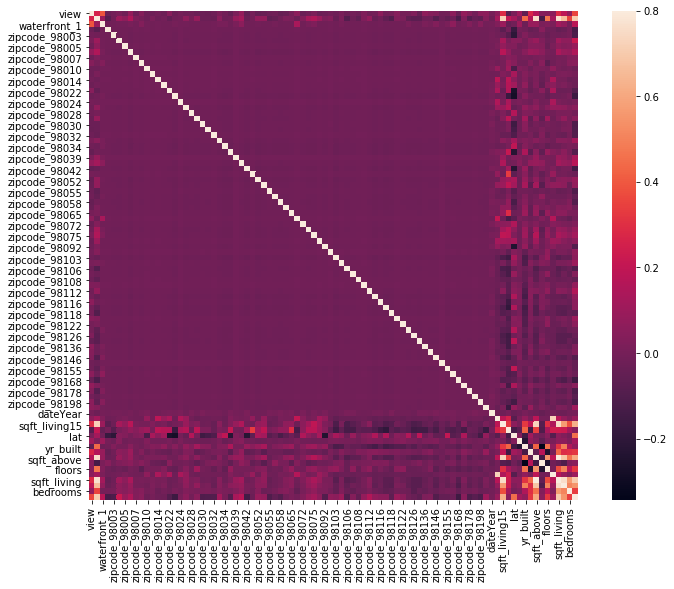

In [124]:
#features impacting data
corrmat= HeatmapX.corr()
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True );

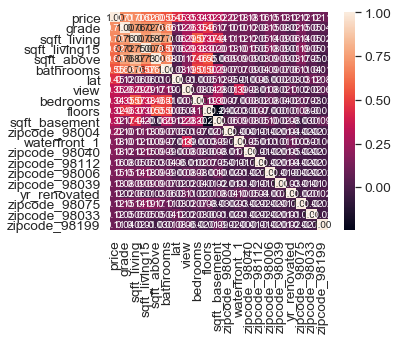

In [126]:
#choose top 21 features 
import numpy as np
k=21
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(HeatmapX[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [127]:
#print those 21
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,price
1,grade
2,sqft_living
3,sqft_living15
4,sqft_above
5,bathrooms
6,lat
7,view
8,bedrooms
9,floors


In [128]:
#put them in a dataframe
X_train20=X_train[['grade','sqft_living','sqft_living15','sqft_above','bathrooms','lat','view','bedrooms','floors','sqft_basement','zipcode_98004','waterfront_1','zipcode_98040','zipcode_98112','zipcode_98006','zipcode_98039','yr_renovated','zipcode_98075','zipcode_98033','zipcode_98199']]
X_valid20=X_valid[['grade','sqft_living','sqft_living15','sqft_above','bathrooms','lat','view','bedrooms','floors','sqft_basement','zipcode_98004','waterfront_1','zipcode_98040','zipcode_98112','zipcode_98006','zipcode_98039','yr_renovated','zipcode_98075','zipcode_98033','zipcode_98199']]

print (X_train20.shape,X_valid20.shape)

(13600, 20) (2400, 20)


In [129]:
#fit those 20 in linear regression
linear_reg=LinearRegression()
linear_reg.fit(X_train20,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [130]:
#predict
y_pred20=linear_reg.predict(X_valid20)
print (y_pred20)

[14.24161783 12.5344326  12.35274253 ... 13.31529746 12.85280393
 13.18516713]


In [131]:
#erroe and accuracy
print (metrics.mean_absolute_error(y_valid,y_pred20))
print (metrics.mean_squared_error(y_valid,y_pred20))
print (np.sqrt(metrics.mean_squared_error(y_valid,y_pred20)))
metrics.r2_score(y_valid,y_pred20)

0.19671611441576786
0.06443741279419446
0.2538452536373183


0.7738815691928552

So as we include more/all features accuracy increases and error decreases. So lets see other methods if we can increase accuracy

Lets take backward selection process to check if it gives higher accuracy

In [132]:
#Recursive feature elimination
from sklearn.feature_selection import RFE
model = LinearRegression()
rfe = RFE(model, 10)
fit = rfe.fit(X_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 10
Selected Features: [False False  True False False  True False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False  True False False
 False  True  True False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False  True  True False False False
  True False False]
Feature Ranking: [46 42  1 78 77  1 12 14 16 15 30 50 51 57 29 58 27 25 52 20 65 64 43 11
 38 39  1  3 61 33 19 22 62 40 48 35 36 28 44 23 21 45 60  2  7  1 47  5
 41  1  1  8 10  9 32  1  6 37 24 49 13 17 55 54 53 34 26 18 66 70 75  4
 69 74 56 63 31 71 73  1  1 59 72 67  1 68 76]


In [133]:
#bfs_list=[X_train,fit.ranking_]
bfs=pd.DataFrame(list(X_train),list(fit.ranking_))

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(bfs)

                0
46           view
42          grade
1    waterfront_1
78  zipcode_98002
77  zipcode_98003
1   zipcode_98004
12  zipcode_98005
14  zipcode_98006
16  zipcode_98007
15  zipcode_98008
30  zipcode_98010
50  zipcode_98011
51  zipcode_98014
57  zipcode_98019
29  zipcode_98022
58  zipcode_98023
27  zipcode_98024
25  zipcode_98027
52  zipcode_98028
20  zipcode_98029
65  zipcode_98030
64  zipcode_98031
43  zipcode_98032
11  zipcode_98033
38  zipcode_98034
39  zipcode_98038
1   zipcode_98039
3   zipcode_98040
61  zipcode_98042
33  zipcode_98045
19  zipcode_98052
22  zipcode_98053
62  zipcode_98055
40  zipcode_98056
48  zipcode_98058
35  zipcode_98059
36  zipcode_98065
28  zipcode_98070
44  zipcode_98072
23  zipcode_98074
21  zipcode_98075
45  zipcode_98077
60  zipcode_98092
2   zipcode_98102
7   zipcode_98103
1   zipcode_98105
47  zipcode_98106
5   zipcode_98107
41  zipcode_98108
1   zipcode_98109
1   zipcode_98112
8   zipcode_98115
10  zipcode_98116
9   zipcode_98117
32  zipcod

In [134]:
X_bfs_train=X_train[['waterfront_1','zipcode_98004','zipcode_98039','zipcode_98105','zipcode_98109','zipcode_98112','zipcode_98119','sqft_basement','sqft_above','sqft_living']]
X_bfs_valid=X_valid[['waterfront_1','zipcode_98004','zipcode_98039','zipcode_98105','zipcode_98109','zipcode_98112','zipcode_98119','sqft_basement','sqft_above','sqft_living']]
print (X_bfs_train.shape,X_bfs_valid.shape)

(13600, 10) (2400, 10)


In [135]:
linear_reg=LinearRegression()
linear_reg.fit(X_bfs_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [136]:
y_predRFE=linear_reg.predict(X_bfs_valid)
print (y_predRFE)

[14.55896642 12.78813593 12.68404012 ... 13.08861748 13.03839622
 13.38914879]


In [137]:
metrics.r2_score(y_valid,y_predRFE)

0.5580160573967434

So 55% accuracy is not desired. 
Lets fix all 87 features with 0.181 error.

# Model Selection

In [ ]:
#Doing cross validation

In [138]:
>>> from sklearn import linear_model
>>> from sklearn.model_selection import cross_val_score


>>> scores=cross_val_score(linear_reg,Train, y_log, cv=10)
>>> print(scores)  

[0.88387737 0.88545264 0.88031465 0.88012614 0.8836596  0.88189673
 0.87538069 0.88515022 0.88749251 0.88133268]


In [139]:
scores.mean()

0.882468324223358

We will use the 88% accuracy since it has slightly better value

In [141]:
#Ridge Regression
from sklearn.linear_model import Ridge

# training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(X_train,y_train)

pred = ridgeReg.predict(X_valid)

#calculating mse

mse = np.mean((pred - y_valid)**2)

print (mse) 
# calculating score
ridgeReg.score(X_valid,y_valid) 

0.03351566347538114


0.8823896102607597

In [143]:
#Lasso Regression 
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.5, normalize=True)

lassoReg.fit(X_train,y_train)

pred1 = lassoReg.predict(X_valid)

# calculating mse

mse = np.mean((pred1 - y_valid)**2)

print (mse)



lassoReg.score(X_valid,y_valid)

0.28505602545786224


-0.0002949897215684949

# Predicting on test data


In [108]:
y_pred1=linear_reg.predict(Test)
print (y_pred1)

[13.62364896 13.08734294 12.63153906 ... 13.01947529 12.42008611
 12.30893551]


In [109]:
y_predTest=np.exp(y_pred1)

In [110]:
sub = pd.DataFrame()

sub['Id'] = test_df['id']
sub['SalePrice'] = y_predTest
sub.to_csv('submissionMidTerm.csv',index=False)

In [111]:
sub
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(sub)

              Id     SalePrice
0       98020220  8.254211e+05
1     9320350020  4.827928e+05
2     7899800857  3.060608e+05
3     3904990030  5.900883e+05
4     4100000050  5.903348e+05
5     1972201550  5.124092e+05
6     5442300807  2.785451e+06
7     1552800010  3.426646e+05
8      259800610  5.424957e+05
9     9550200650  4.908330e+05
10    2998300075  1.081722e+06
11    3123089010  5.283642e+05
12    3303850390  4.134708e+06
13    1561900330  3.943888e+05
14    4299700095  3.259209e+05
15    6610000591  9.451484e+05
16    7922900250  4.442798e+05
17    3905081520  5.914883e+05
18    6450301835  3.229238e+05
19    3990200125  3.738459e+05
20    1024049024  1.639203e+06
21    4322200105  2.859220e+05
22    2726059144  1.152988e+06
23    7305300695  5.241877e+05
24    4045500625  6.832028e+05
25    1787600294  3.565467e+05
26    9477100060  4.174333e+05
27    3530540090  2.671596e+05
28    7202340370  4.362889e+05
29     263000253  5.655121e+05
30    3574800090  4.771287e+05
31    19

So price of house in King County can be predicted with a accuracy of 88% with 0.181 error. 